In [1]:
# b) Quais os fatores que provocam maior lentidão?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/traffic_brazil.csv", delimiter=";", decimal=",")

In [4]:
data['Slowness in traffic (%)'] = data['Slowness in traffic (%)'].astype(float)

In [5]:
data = data.sort_values(by='Slowness in traffic (%)')[-20:]

In [6]:
# Remover a coluna da hora e a colena com a porcentagem de lentidão
dataProcess = data.drop(data.columns[[0, 17]], axis=1)

In [7]:
# Função para somar o número de ocorrência para cada tipo de incidente
def createDataFrame (data):
    values = []
    keysWithValues = []
    keys = data.keys()
    
    for i in range(0, len(keys)):
        value = data[keys[i]].sum()
        if (value > 0):
            values.append(value)
            keysWithValues.append(keys[i])
    return (keysWithValues, values)
    
keys, values = createDataFrame(dataProcess)

df = pd.DataFrame([values], columns=keys)

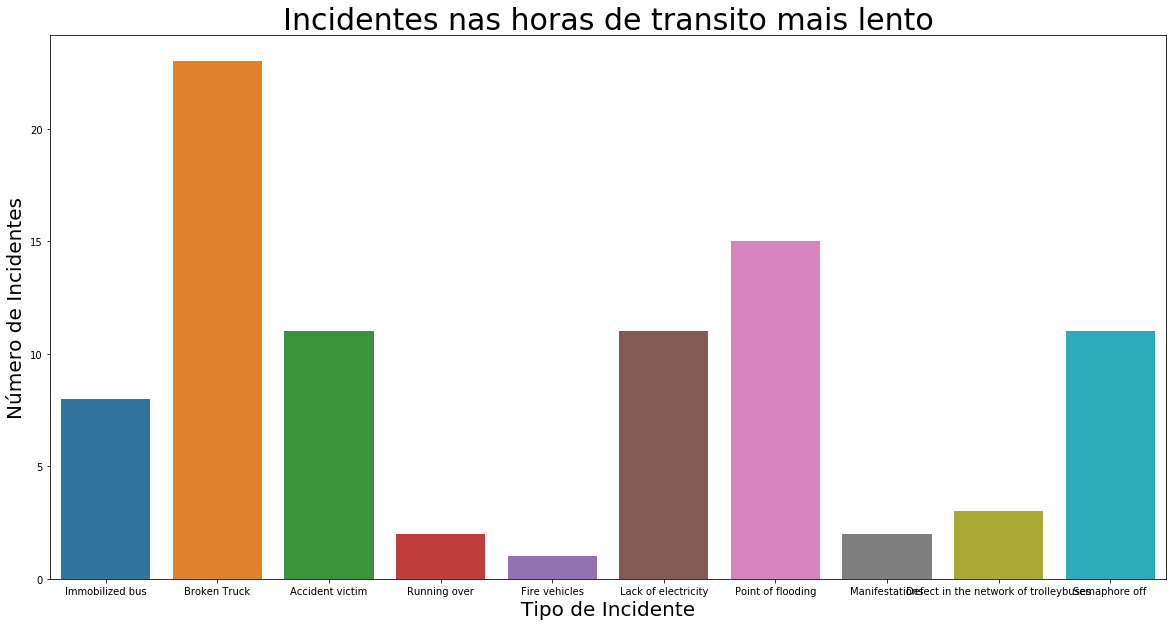

In [8]:
plt.figure(figsize=(20,10))

sns.barplot(data=df);

plt.title('Incidentes nas horas de transito mais lento', fontsize=30)
plt.ylabel('Número de Incidentes', fontsize=20)
plt.xlabel('Tipo de Incidente', fontsize=20)
plt.show()

In [9]:
# Os fatores que provocam mais lentidão no transito são:
# - 1. Caminhão quebrado
# - 2. Ponto de alagamento
# - 3. Queda de energia / Semafaros desligados / Acidentes com vítimas